## Logistic regression

Logistic regression is a binary classification model that estimates the probability of a sample belonging to a particular class (e.g., positive or negative). It uses a linear combination of features, similar to linear regression, but passes the result through a logistic (sigmoid) function to constrain the output to a probability between 0 and 1.

1. $z = w \cdot x + b$
2. $g(z) = \frac{e^z}{1 + e^z}$

A threshold (e.g., 0.5) is used to classify samples:

- If $(g(z) \geq 0.5)$, predict positive class.
- If $(g(z) < 0.5)$, predict negative class.

The model parameters ((w) and (b)) are learned by maximizing the log-likelihood of the observed data, or equivalently, minimizing the negative log-likelihood (which serves as the loss function):

$$
\mathcal{L}(w, b) = \frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right]

$$

$$
J(w, b) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right]
$$

Gradient Descent Optimization:

Gradient descent is commonly used to optimize the parameters by iteratively updating them based on the gradients of the loss function. It works by:

1. **Initialization:** Starting with an initial guess for the coefficients (betas).
2. **Calculation:**
    1. Computing the loss to evaluate the model's performance.
    2. Calculating the gradients of the loss with respect to the coefficients (**same form as linear regression**):
    
    $$
    \frac{\partial J}{\partial w_j} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)}) \cdot x_j^{(i)} \quad \text{for } j = 1, 2, ..., n
    $$
    
    $$
    \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})
    $$
    
3. **Update:** Updating the coefficients using the gradients and a learning rate (alpha):
    
    $$
    w_j = w_j - \alpha \cdot \frac{\partial J}{\partial w_j} \quad \text{for } j = 1, 2, ..., n
    $$
    
    $$
    b = b - \alpha \cdot \frac{\partial J}{\partial b}
    
    $$
    
4. **Iteration:** Repeating steps 2 and 3 until the loss converges or reaches a satisfactory level.

### Data

In [1]:
from sklearn.datasets import make_classification

In [2]:
bias_true = 2.5
X, y = make_classification(n_samples=200, n_features=4, random_state=0)
print(X.shape, y.shape)

(200, 4) (200,)


In [14]:
# balanced
y.mean()

0.5

### Implementation

In [3]:
import numpy as np

In [4]:
class LogisticRegression:
    def __init__(self, max_iterations=100, learning_rate=0.1):
        self.max_iterations = max_iterations
        self.learning_rate = learning_rate

    def initialize(self, num_features):
        self.coef = np.zeros(num_features)  # (n,)
        self.bias = 0

    def sigmoid(self, z):
        # return np.exp(z) / (1 + np.exp(z))
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        m, n = X.shape  # (m, n)
        self.initialize(n)
        losses = []

        for i in range(self.max_iterations):
            # y_hat = sigmoid(wx + b)
            preds = self.sigmoid(X @ self.coef + self.bias)  # (m,)

            # negative log likelihood loss
            loss = -np.mean(y * np.log(preds) + (1 - y) * np.log(1 - preds))
            losses.append(loss)

            # gradient descent
            self.coef -= self.learning_rate / m * X.T @ (preds - y)  # (n,)
            self.bias -= self.learning_rate * np.mean(preds - y)

        return losses, self.coef, self.bias

    def predict(self, X):
        return self.sigmoid(X @ self.coef + self.bias)  # (m,)

### Experiment

In [5]:
num_samples = X.shape[0]

# the new way
rng = np.random.default_rng(0)
permutated_indicies = rng.permutation(num_samples)
train_size = int(num_samples * 0.8)
train_indices, test_indices = (
    permutated_indicies[:train_size],
    permutated_indicies[train_size:],
)

In [6]:
X_train, y_train = X[train_indices], y[train_indices]
X_test, y_test = X[test_indices], y[test_indices]

print(X_train.shape, X_test.shape)

(160, 4) (40, 4)


In [7]:
# standardize the data
means = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train = (X_train - means) / std
X_test = (X_test - means) / std

In [8]:
model = LogisticRegression(max_iterations=200)
losses, coef, bias = model.fit(X_train, y_train)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

[Text(0.5, 1.0, 'Train error over iterations'),
 Text(0.5, 0, 'Iteration'),
 Text(0, 0.5, 'MSE')]

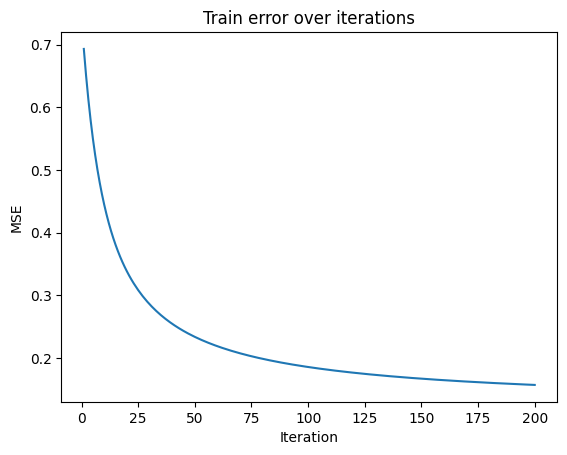

In [10]:
# visualize train error over iterations
ax = sns.lineplot(x=range(1, len(losses) + 1), y=losses)
ax.set(title="Train error over iterations", xlabel="Iteration", ylabel="MSE")

In [11]:
y_preds = model.predict(X_test)

# use a threshold of 0.5
y_preds = (y_preds > 0.5).astype(int)

# accuracy
print(f"Test accuracy: {np.mean(y_preds == y_test)}")

Test accuracy: 0.95


In [12]:
# check coefficients and bias
coef

array([ 1.47352041, -0.09104712, -1.0271309 , -1.48452045])

In [13]:
bias

-0.2943155762252519